# Realsense camera test

This notebook uses intel realsense D415 depth camera.

In [1]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

## Camera Initialization

### Documentation Overview

First a quick look on `pipeline` and `config` objects and the methods wi will use later from this classes. Feel free to skip thsi section if you want.

In [2]:
rs.pipeline?

Docstring:     
The pipeline simplifies the user interaction with the device and computer vision processing modules.
The class abstracts the camera configuration and streaming, and the vision modules triggering and threading.
It lets the application focus on the computer vision output of the modules, or the device output data.
The pipeline can manage computer vision modules, which are implemented as a processing blocks.
The pipeline is the consumer of the processing block interface, while the application consumes the computer vision interface.
Init docstring:
__init__(self: pyrealsense2.pyrealsense2.pipeline, ctx: pyrealsense2.pyrealsense2.context = <pyrealsense2.pyrealsense2.context object at 0x7ffac45fb270>) -> None

The caller can provide a context created by the application, usually for playback or testing purposes.
File:           ~/miniconda3/envs/cv/lib/python3.7/site-packages/pyrealsense2/pyrealsense2.cpython-37m-x86_64-linux-gnu.so
Type:           pybind11_type
Subclasses:    

In [3]:
rs.config?

Docstring:     
The config allows pipeline users to request filters for the pipeline streams and device selection and configuration.
This is an optional step in pipeline creation, as the pipeline resolves its streaming device internally.
Config provides its users a way to set the filters and test if there is no conflict with the pipeline requirements from the device.
It also allows the user to find a matching device for the config filters and the pipeline, in order to select a device explicitly, and modify its controls before streaming starts.
Init docstring: __init__(self: pyrealsense2.pyrealsense2.config) -> None
File:           ~/miniconda3/envs/cv/lib/python3.7/site-packages/pyrealsense2/pyrealsense2.cpython-37m-x86_64-linux-gnu.so
Type:           pybind11_type
Subclasses:     


`config.enable_stream` method help

In [4]:
rs.config.enable_stream?

Call signature:  rs.config.enable_stream(*args, **kwargs)
Type:            instancemethod
String form:     <instancemethod enable_stream at 0x7ffac45dfd10>
Docstring:      
enable_stream(*args, **kwargs)
Overloaded function.

1. enable_stream(self: pyrealsense2.pyrealsense2.config, stream_type: pyrealsense2.pyrealsense2.stream, stream_index: int, width: int, height: int, format: pyrealsense2.pyrealsense2.format = <format.any: 0>, framerate: int = 0) -> None

Enable a device stream explicitly, with selected stream parameters.
The method allows the application to request a stream with specific configuration.
If no stream is explicitly enabled, the pipeline configures the device and its streams according to the attached computer vision modules and processing blocks requirements, or default configuration for the first available device.
The application can configure any of the input stream parameters according to its requirement, or set to 0 for don't care value.
The config accumulates the 

In [5]:
rs.pipeline.start?

Call signature:  rs.pipeline.start(*args, **kwargs)
Type:            instancemethod
String form:     <instancemethod start at 0x7ffac45fb450>
Docstring:      
start(*args, **kwargs)
Overloaded function.

1. start(self: pyrealsense2.pyrealsense2.pipeline) -> pyrealsense2.pyrealsense2.pipeline_profile

Start the pipeline streaming with its default configuration.
The pipeline streaming loop captures samples from the device, and delivers them to the attached computer vision modules and processing blocks, according to each module requirements and threading model.
During the loop execution, the application can access the camera streams by calling wait_for_frames() or poll_for_frames().
The streaming loop runs until the pipeline is stopped.
Starting the pipeline is possible only when it is not started. If the pipeline was started, an exception is raised.


2. start(self: pyrealsense2.pyrealsense2.pipeline, config: pyrealsense2.pyrealsense2.config) -> pyrealsense2.pyrealsense2.pipeline_profile

In [6]:
rs.pipeline.wait_for_frames?

Call signature:  rs.pipeline.wait_for_frames(*args, **kwargs)
Type:            instancemethod
String form:     <instancemethod wait_for_frames at 0x7ffac45fb490>
Docstring:      
wait_for_frames(self: pyrealsense2.pyrealsense2.pipeline, timeout_ms: int = 5000) -> pyrealsense2.pyrealsense2.composite_frame

Wait until a new set of frames becomes available.
The frames set includes time-synchronized frames of each enabled stream in the pipeline.
In case of different frame rates of the streams, the frames set include a matching frame of the slow stream, which may have been included in previous frames set.
The method blocks the calling thread, and fetches the latest unread frames set.
Device frames, which were produced while the function wasn't called, are dropped. To avoid frame drops, this method should be called as fast as the device frame rate.
The application can maintain the frames handles to defer processing. However, if the application maintains too long history, the device may lack 

In [7]:
rs.composite_frame?

Docstring:      Extends the frame class with additional frameset related attributes and functions
Init docstring: __init__(self: pyrealsense2.pyrealsense2.composite_frame, arg0: pyrealsense2.pyrealsense2.frame) -> None
File:           ~/miniconda3/envs/cv/lib/python3.7/site-packages/pyrealsense2/pyrealsense2.cpython-37m-x86_64-linux-gnu.so
Type:           pybind11_type
Subclasses:     


In [8]:
rs.composite_frame.get_color_frame?

Call signature:  rs.composite_frame.get_color_frame(*args, **kwargs)
Type:            instancemethod
String form:     <instancemethod get_color_frame at 0x7ffac45df5d0>
Docstring:      
get_color_frame(self: pyrealsense2.pyrealsense2.composite_frame) -> pyrealsense2.pyrealsense2.video_frame

Retrieve the first color frame, if no frame is found, search for the color frame from IR stream. If one still can't be found, return an empty frame instance.
Class docstring:
instancemethod(function)

Bind a function to a class.


In [9]:
rs.composite_frame.get_depth_frame?

Call signature:  rs.composite_frame.get_depth_frame(*args, **kwargs)
Type:            instancemethod
String form:     <instancemethod get_depth_frame at 0x7ffac45df350>
Docstring:      
get_depth_frame(self: pyrealsense2.pyrealsense2.composite_frame) -> pyrealsense2.pyrealsense2.depth_frame

Retrieve the first depth frame, if no frame is found, return an empty frame instance.
Class docstring:
instancemethod(function)

Bind a function to a class.


In [10]:
rs.stream?

Docstring:     
Streams are different types of data provided by RealSense devices.

Members:

  any

  depth

  color

  infrared

  fisheye

  gyro

  accel

  gpio

  pose

  confidence
Init docstring: __init__(self: pyrealsense2.pyrealsense2.stream, value: int) -> None
File:           ~/miniconda3/envs/cv/lib/python3.7/site-packages/pyrealsense2/pyrealsense2.cpython-37m-x86_64-linux-gnu.so
Type:           pybind11_type
Subclasses:     


In [11]:
rs.colorizer?

Docstring:      Colorizer filter generates color images based on input depth frame
Init docstring:
__init__(*args, **kwargs)
Overloaded function.

1. __init__(self: pyrealsense2.pyrealsense2.colorizer) -> None

2. __init__(self: pyrealsense2.pyrealsense2.colorizer, color_scheme: float) -> None

Possible values for color_scheme:
0 - Jet
1 - Classic
2 - WhiteToBlack
3 - BlackToWhite
4 - Bio
5 - Cold
6 - Warm
7 - Quantized
8 - Pattern
File:           ~/miniconda3/envs/cv/lib/python3.7/site-packages/pyrealsense2/pyrealsense2.cpython-37m-x86_64-linux-gnu.so
Type:           pybind11_type
Subclasses:     


In [12]:
rs.colorizer.colorize?

Call signature:  rs.colorizer.colorize(*args, **kwargs)
Type:            instancemethod
String form:     <instancemethod colorize at 0x7ffac45e62d0>
Docstring:      
colorize(self: pyrealsense2.pyrealsense2.colorizer, depth: pyrealsense2.pyrealsense2.frame) -> pyrealsense2.pyrealsense2.video_frame

Start to generate color image base on depth frame
Class docstring:
instancemethod(function)

Bind a function to a class.


### Initalization

Here we define some constants to enable camera streams later

In [2]:
WIDTH = 640
HEIGHT = 480
FRAME_RATE = 30

Instantiate `pipeline` and `congif` objects, then enable color and depth streams and finally start the stream, and instatiate colorizer and align objects.

In [42]:
pipeline = rs.pipeline()
config = rs.config()

config.enable_stream(rs.stream.depth, WIDTH, HEIGHT, rs.format.z16, FRAME_RATE)
config.enable_stream(rs.stream.color, WIDTH, HEIGHT, rs.format.bgr8, FRAME_RATE)

colorizer = rs.colorizer()
align = rs.align(rs.stream.color)

### Get Intrinsic and Extrinsic Parameters

In [33]:
pipeline.start(config)

profile = pipeline.get_active_profile()

color_profile = rs.video_stream_profile(profile.get_stream(rs.stream.color))
color_intrinsics = color_profile.get_intrinsics()
print(color_intrinsics)

depth_profile = rs.video_stream_profile(profile.get_stream(rs.stream.depth))
depth_intrinsics = depth_profile.get_intrinsics()
print(depth_intrinsics)

depth_to_color_extrinsics = depth_profile.get_extrinsics_to(color_profile)
print(depth_to_color_extrinsics)

pipeline.stop()

[ 640x480  p[318.591 252.508]  f[617.497 617.228]  Inverse Brown Conrady [0 0 0 0 0] ]
[ 640x480  p[319.606 244.781]  f[600.863 600.863]  Brown Conrady [0 0 0 0 0] ]
rotation: [0.999985, 0.00174205, -0.00528593, -0.00175852, 0.999994, -0.00311266, 0.00528048, 0.0031219, 0.999981]
translation: [0.0152979, -3.99636e-05, -0.000515508]


Format this parameters better

In [34]:
calibration_params = {'color intrinsics': color_intrinsics,
                      'depth intrinsics': depth_intrinsics,
                      'depth to color extrinsics': depth_to_color_extrinsics}

for name, params in calibration_params.items():
    print(name.capitalize())
    for attr in [param_name for param_name in dir(params) if not param_name.startswith('__')]:
        print(f"\t{attr}: {getattr(params, attr)}")
    print()

Color intrinsics
	coeffs: [0.0, 0.0, 0.0, 0.0, 0.0]
	fx: 617.4967041015625
	fy: 617.2276611328125
	height: 480
	model: distortion.inverse_brown_conrady
	ppx: 318.59136962890625
	ppy: 252.50799560546875
	width: 640

Depth intrinsics
	coeffs: [0.0, 0.0, 0.0, 0.0, 0.0]
	fx: 600.8629760742188
	fy: 600.8629760742188
	height: 480
	model: distortion.brown_conrady
	ppx: 319.6057434082031
	ppy: 244.78125
	width: 640

Depth to color extrinsics
	rotation: [0.9999845027923584, 0.0017420530784875154, -0.005285933148115873, -0.0017585224704816937, 0.999993622303009, -0.003112656995654106, 0.0052804769948124886, 0.003121904330328107, 0.999981164932251]
	translation: [0.015297875739634037, -3.996360464952886e-05, -0.0005155084654688835]



Write parameters to a JSON file

In [49]:
import json

for name, params in calibration_params.items():
    calibration_data[name] = {attr:str(getattr(params, attr)) if attr == 'model' else getattr(params, attr)
                              for attr in dir(params) if not attr.startswith('__')}
    
calibration_json = json.dumps(calibration_data, indent=2)
    
print(calibration_json)

with open('calibration_data.json', 'w+') as outfile:
    json.dump(calibration_data, outfile, indent=2)

{
  "color intrinsics": {
    "coeffs": [
      0.0,
      0.0,
      0.0,
      0.0,
      0.0
    ],
    "fx": 617.4967041015625,
    "fy": 617.2276611328125,
    "height": 480,
    "model": "distortion.inverse_brown_conrady",
    "ppx": 318.59136962890625,
    "ppy": 252.50799560546875,
    "width": 640
  },
  "depth intrinsics": {
    "coeffs": [
      0.0,
      0.0,
      0.0,
      0.0,
      0.0
    ],
    "fx": 600.8629760742188,
    "fy": 600.8629760742188,
    "height": 480,
    "model": "distortion.brown_conrady",
    "ppx": 319.6057434082031,
    "ppy": 244.78125,
    "width": 640
  },
  "depth to color extrinsics": {
    "rotation": [
      0.9999845027923584,
      0.0017420530784875154,
      -0.005285933148115873,
      -0.0017585224704816937,
      0.999993622303009,
      -0.003112656995654106,
      0.0052804769948124886,
      0.003121904330328107,
      0.999981164932251
    ],
    "translation": [
      0.015297875739634037,
      -3.996360464952886e-05,
      -0

## Take frames

Here we wait for frames and capture them.

In [50]:
n_frames = 10

pipeline.start(config)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for _ in range(5):
    pipeline.wait_for_frames()

depth_frame_list = []
for _ in range(n_frames):
    frames = pipeline.wait_for_frames()
    frames = align.process(frames)
    depth_frame = frames.get_depth_frame()
    depth_frame_list.append(depth_frame)

color_frame = frames.get_color_frame()

pipeline.stop()

if not depth_frame or not color_frame:
    print("Unable to retrieve frames, please run this cell again")
else:
    print("Frames retireved succesfully!")

Frames retireved succesfully!


## Depth frame postprocessing

First we instantiate filters. Decimation filter reduces the image resolution, and Temporal filter needs to process several frames. This is the recommended order to apply the post-processing filters given by intel.

In [51]:
# align depth frames to color frame

decimation = rs.decimation_filter()
depth_to_disparity = rs.disparity_transform(True)
spatial = rs.spatial_filter()
# enable spactial filter to perform some basic hole filling
spatial.set_option(rs.option.holes_fill, 3)
temporal = rs.temporal_filter()
disparity_to_depth = rs.disparity_transform(False)
hole_filling = rs.hole_filling_filter()     

# apply filter
for i in range(n_frames):
    frame = depth_frame_list[i]
    #frame = decimation.process(frame)
    frame = depth_to_disparity.process(frame)
    frame = spatial.process(frame)
    frame = temporal.process(frame)
    frame = disparity_to_depth.process(frame)
    frame = hole_filling.process(frame)

## Frame Visualization

Convert frames to numpy arrays and plot them using matplotlib

In [38]:
depth_raw_color = colorizer.colorize(depth_frame)
depth_filt_color = colorizer.colorize(frame)

depth_raw_img = np.asanyarray(depth_frame.get_data())
depth_filt_img = np.asanyarray(frame.get_data())
color_img = np.asanyarray(color_frame.get_data())

depth_raw_color_img = np.asanyarray(depth_raw_color.get_data())
depth_filt_color_img = np.asanyarray(depth_filt_color.get_data())

print("Depth raw image shape:", depth_raw_img.shape)
print("Depth raw image datatype:", depth_raw_img.dtype)

print("Depth filtered image shape:", depth_filt_img.shape)
print("Depth filtered image datatype:", depth_filt_img.dtype)

print("Depth raw colored image shape:", depth_raw_color_img.shape)
print("Depth raw colored image datatype:", depth_raw_color_img.dtype)

print("Depth filtered colored image shape:", depth_filt_color_img.shape)
print("Depth filtered colored image datatype:", depth_filt_color_img.dtype)

print("Color image shape:", color_img.shape)
print("Color image datatype:", color_img.dtype)

Depth raw image shape: (480, 640)
Depth raw image datatype: uint16
Depth filtered image shape: (240, 320)
Depth filtered image datatype: uint16
Depth raw colored image shape: (480, 640, 3)
Depth raw colored image datatype: uint8
Depth filtered colored image shape: (240, 320, 3)
Depth filtered colored image datatype: uint8
Color image shape: (480, 640, 3)
Color image datatype: uint8


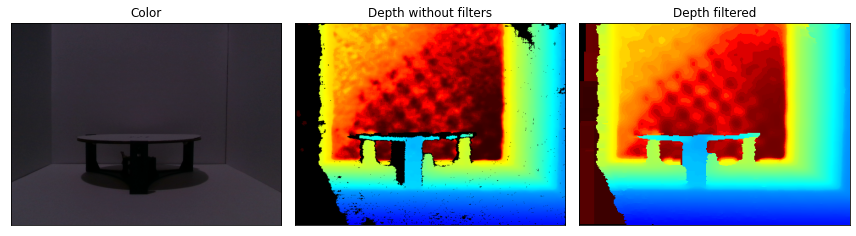

In [52]:
(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
# plot each of the images
axs[0].imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
axs[1].imshow(depth_raw_color_img)
axs[2].imshow(depth_filt_color_img)
# set the titles of each axes
axs[0].set_title("Color")
axs[1].set_title("Depth without filters")
axs[2].set_title("Depth filtered")
# loop over each of the axes and turn off the x and y ticks
for i in range(0, 3):
    axs[i].get_xaxis().set_ticks([])
    axs[i].get_yaxis().set_ticks([])
# show the plots
plt.tight_layout()
plt.show()

## Store Frames

Using `cv2.imwrite` to save bgr images as .jpg and depth as .tiff

To read the images, one must specify `cv2.IMREAD_ANYDEPTH` to load depth image as unsigned 16 bit array

In [45]:
color_img_bgr = cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR)
cv2.imwrite('color.jpg', color_img_bgr)

True

In [22]:
cv2.imwrite('depth.tiff', depth_img)

True

In [23]:
cv2.imwrite('depth_colored.jpg', depth_colored_img)

True

In [24]:
depth_from_disk = cv2.imread('depth.tiff', cv2.IMREAD_ANYDEPTH)
print(depth_from_disk.shape)
print(depth_from_disk.dtype)

(480, 640)
uint16


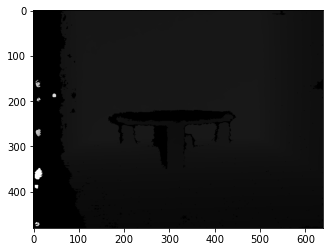

In [19]:
plt.imshow(cv2.convertScaleAbs(depth_from_disk, alpha=0.03), cmap='gray')